This project involves the scrapping of Mercury Investor Database. Mercury Investor is a free, online-first banking platform designed for startups and tech-focused businesses.
The project helps in extracting informations such as investors name, role in their organization, social links, check size etc and storing this informations  in a sheet.

This project is achieved by interacting with the webpage using selenium to render all javascript and scraping the required data using Beautiful soup in python.

Below is the Dataframe output of the extracted result.

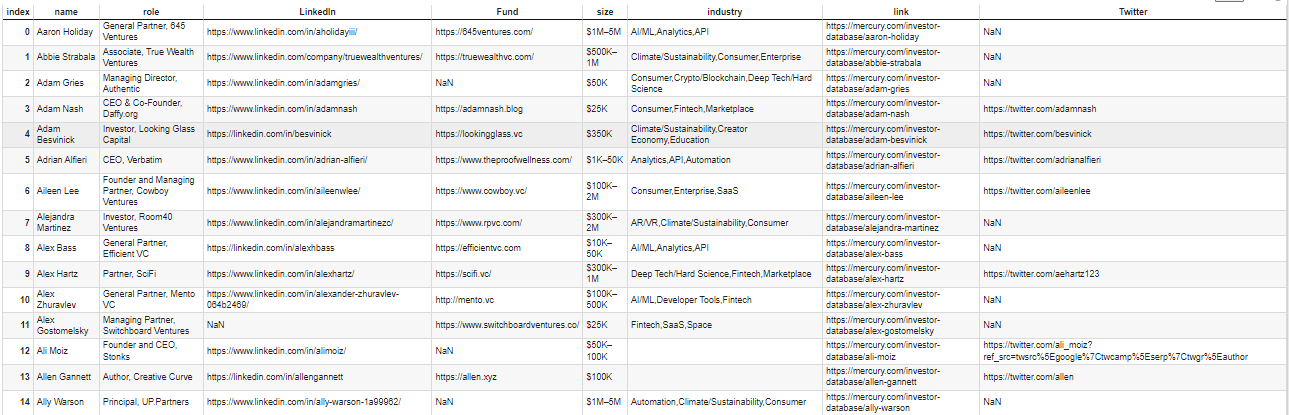

##Install dependencies

In [ ]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
23 packages can be upgraded. Run 'apt list --upgradable' to see them.
E: dpkg was interrupted, you must manually run 'sudo dpkg --configure -a' to correct the problem. 

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.remote.webelement import WebElement
from selenium.common.exceptions import StaleElementReferenceException, TimeoutException, WebDriverException
import re

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/117/chromedriver'

##Data Scaping

In [ ]:
#create a function to get a links to each investors
def get_links(url):
  # set up the webdriver
  driver = webdriver.Chrome(options=chrome_options)

  driver.get(url)
  element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'styles__investorTable_KqPd6')))
  time.sleep(3)

  soup = BeautifulSoup(driver.page_source)

  links = []
  for element in soup.find_all("div", {"class": "styles__investorBodyRowWrapper_Up0op"}):
    link = element.find('a', href=True)['href']
    link = url + re.sub(r'/investor-database', '', link)
    links.append(link)
  return links

In [ ]:
info = []

base_url = 'https://mercury.com/investor-database'
links = get_links(base_url)

for n in range(len(links)):
  # set up the webdriver
  driver = webdriver.Chrome(options=chrome_options)

  driver.get(links[n])
  element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'styles__wrapper_nF15Q.styles__grid_I8EVa')))
  time.sleep(5)

  soup = BeautifulSoup(driver.page_source)
  data = {}
  #retrieving the name
  data['name'] = soup.find('h1').text
  #retrieving the role
  data['role'] = soup.find('p', {'class': 'styles__regularValue_qkp_Y'}).text
  #retrieving all social links
  element = soup.find('div', {'class' : 'styles__socialButtons_BshOi'})
  for href in element.find_all('a'):
    data[href.text] = href['href']
  #retrieving the check size
  data['size'] = soup.find('p', {'class' : 'styles__hugeValue_vB1_k'}).text
  #retrieving industry data
  industries = []
  try:
    for element in soup.find('div', {'class': 'styles__industriesRow_Zjoa5'}).find_all('div'):
      industries.append(element.text)
  except AttributeError:
    print("")
  data['industry'] = industries
  #adding the link
  data['link'] = links[n]
  #appending data to info list
  info.append(data)
  time.sleep(10)


#close driver
driver.close()

In [ ]:
data = pd.DataFrame.from_dict(info)
data

,name,role,LinkedIn,Fund,size,industry,link,Twitter
0,Aaron Holiday,"General Partner, 645 Ventures",https://www.linkedin.com/in/aholidayiii/,https://645ventures.com/,$1M–5M,"[AI/ML, Analytics, API]",https://mercury.com/investor-database/aaron-ho...,NaN
1,Abbie Strabala,"Associate, True Wealth Ventures",https://www.linkedin.com/company/truewealthven...,https://truewealthvc.com/,$500K–1M,"[Climate/Sustainability, Consumer, Enterprise]",https://mercury.com/investor-database/abbie-st...,NaN
2,Adam Gries,"Managing Director, Authentic",https://www.linkedin.com/in/adamgries/,NaN,$50K,"[Consumer, Crypto/Blockchain, Deep Tech/Hard S...",https://mercury.com/investor-database/adam-gries,NaN
3,Adam Nash,"CEO & Co-Founder, Daffy.org",https://www.linkedin.com/in/adamnash,https://adamnash.blog,$25K,"[Consumer, Fintech, Marketplace]",https://mercury.com/investor-database/adam-nash,https://twitter.com/adamnash
4,Adam Besvinick,"Investor, Looking Glass Capital",https://linkedin.com/in/besvinick,https://lookingglass.vc,$350K,"[Climate/Sustainability, Creator Economy, Educ...",https://mercury.com/investor-database/adam-bes...,https://twitter.com/besvinick
5,Adrian Alfieri,"CEO, Verbatim",https://www.linkedin.com/in/adrian-alfieri/,https://www.theproofwellness.com/,$1K–50K,"[Analytics, API, Automation]",https://mercury.com/investor-database/adrian-a...,https://twitter.com/adrianalfieri
6,Aileen Lee,"Founder and Managing Partner, Cowboy Ventures",https://www.linkedin.com/in/aileenwlee/,https://www.cowboy.vc/,$100K–2M,"[Consumer, Enterprise, SaaS]",https://mercury.com/investor-database/aileen-lee,https://twitter.com/aileenlee
7,Alejandra Martinez,"Investor, Room40 Ventures",https://www.linkedin.com/in/alejandramartinezc/,https://www.rpvc.com/,$300K–2M,"[AR/VR, Climate/Sustainability, Consumer]",https://mercury.com/investor-database/alejandr...,NaN
8,Alex Bass,"General Partner, Efficient VC",https://linkedin.com/in/alexhbass,https://efficientvc.com,$10K–50K,"[AI/ML, Analytics, API]",https://mercury.com/investor-database/alex-bass,NaN
9,Alex Hartz,"Partner, SciFi",https://www.linkedin.com/in/alexhartz/,https://scifi.vc/,$300K–1M,"[Deep Tech/Hard Science, Fintech, Marketplace]",https://mercury.com/investor-database/alex-hartz,https://twitter.com/aehartz123


In [ ]:
#writing extracted data to file
import datetime


date = datetime.date.today()
data.to_csv('Record_'+ str(date), index= False)